# Final Project - AI/ML Challenge

This project is created to finish 5 week Data Science Bootcamp held by Dphi.
In this project, we are required to develop a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).


Author: Leonardus Berlianto Setiawan

In [2]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

## Exploratory Data Analysis

In this stage, I will try to explore the data further to obtain insight regarding the model development.

In [4]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [5]:
pharma_data.head(100)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17418,16,1732,DX6,47,19.910977,NO,RURAL,Stable,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
96,10297,18,1635,DX6,53,24.834546,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
97,9311,13,7538,DX2,49,26.641499,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
98,19080,36,12410,DX2,32,22.235589,YES,URBAN,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0


In [6]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [7]:
pharma_data.corr()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.007446,0.000235,0.000304,-0.007259,0.004557,0.005110,0.010724,-0.006509,0.000575,0.007779,0.042146,0.011111,-0.004685
Diagnosed_Condition,-0.007446,1.000000,0.008315,-0.008971,0.008305,0.004940,0.003936,-0.002826,-0.007843,0.007902,0.005931,-0.042806,0.004844,-0.004450
Patient_ID,0.000235,0.008315,1.000000,0.014015,-0.023189,-0.005371,-0.012235,-0.006363,-0.004678,0.000746,0.007838,0.042348,-0.008344,-0.004214
Patient_Age,0.000304,-0.008971,0.014015,1.000000,-0.006560,-0.027559,-0.013554,-0.012989,0.003471,-0.004523,0.006697,0.117190,-0.019371,-0.074934
Patient_Body_Mass_Index,-0.007259,0.008305,-0.023189,-0.006560,1.000000,0.019681,0.002384,-0.016850,-0.008383,-0.003661,-0.015598,-0.140303,-0.014036,-0.121844
A,0.004557,0.004940,-0.005371,-0.027559,0.019681,1.000000,-0.063683,-0.089832,-0.076064,-0.163082,-0.054378,-0.072338,0.170448,-0.049886
B,0.005110,0.003936,-0.012235,-0.013554,0.002384,-0.063683,1.000000,-0.021175,-0.002050,-0.017804,-0.016013,-0.009692,0.392773,-0.049805
C,0.010724,-0.002826,-0.006363,-0.012989,-0.016850,-0.089832,-0.021175,1.000000,0.007528,-0.026294,0.000903,-0.011624,0.445349,-0.033356
D,-0.006509,-0.007843,-0.004678,0.003471,-0.008383,-0.076064,-0.002050,0.007528,1.000000,-0.013478,-0.009650,-0.007368,0.320736,-0.105710
E,0.000575,0.007902,0.000746,-0.004523,-0.003661,-0.163082,-0.017804,-0.026294,-0.013478,1.000000,-0.005260,-0.019637,0.541840,0.021527


### Plotting data

#### Age vs Survival Rate

[Text(0.5, 0, 'Patient Age'), Text(0, 0.5, 'Number of Died People')]

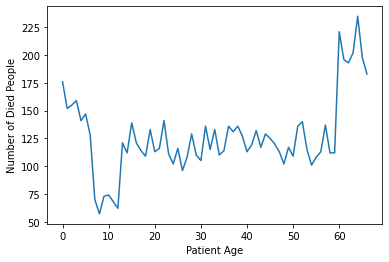

In [128]:
died = pharma_data[pharma_data['Survived_1_year']==0].groupby(['Patient_Age']).count()
ax = sns.lineplot(data=died, 
                  x="Patient_Age", y="Survived_1_year")
ax.set(xlabel='Patient Age', ylabel='Number of Died People')

[Text(0.5, 0, 'Patient Age'), Text(0, 0.5, 'Number of Survivor')]

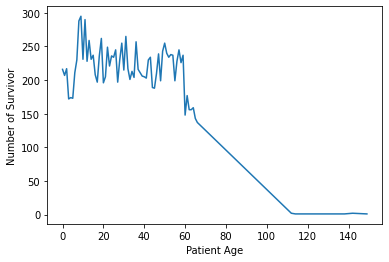

In [146]:
survived = pharma_data[pharma_data['Survived_1_year']==1].groupby(['Patient_Age']).count()
ax = sns.lineplot(data=survived, 
                  x="Patient_Age", y="Survived_1_year")
ax.set(xlabel='Patient Age', ylabel='Number of Survivor')

#### Number of Previous Condition vs Survival Rate

<AxesSubplot:xlabel='Number_of_prev_cond', ylabel='count'>

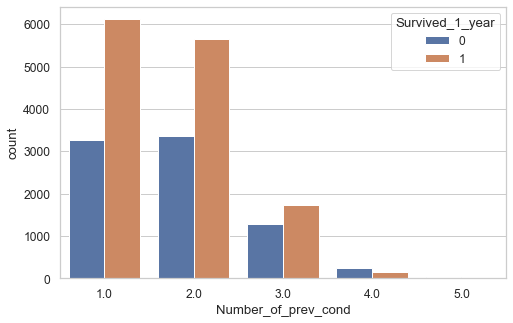

In [39]:
sns.countplot(x="Number_of_prev_cond", hue="Survived_1_year", data=pharma_data)

#### Smoker Status vs Survival Rate

<AxesSubplot:xlabel='Patient_Smoker', ylabel='count'>

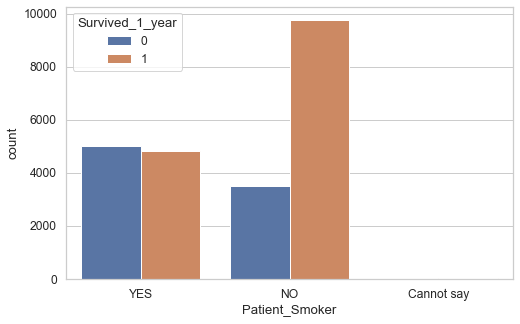

In [38]:
sns.countplot(x="Patient_Smoker", hue="Survived_1_year", data=pharma_data)

## Data Preprocessing

<AxesSubplot:>

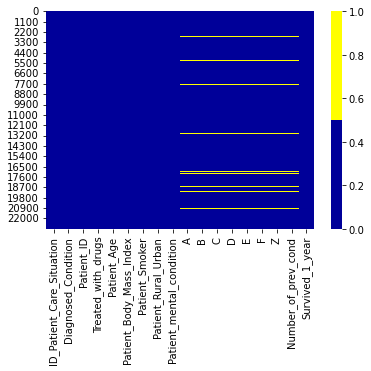

In [148]:
#Checking the missing values
cols = pharma_data.columns
colours = ['#000099', '#ffff00']
sns.heatmap(pharma_data[cols].isnull(), cmap=sns.color_palette(colours))

In [149]:
#Clear missing values
ind_missing = pharma_data[pharma_data['A'].isna() | pharma_data['Treated_with_drugs'].isna()].index
pharma_data = pharma_data.drop(ind_missing,axis=0)
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [231]:
#change smoking status from YES/NO to 1/0
pharma_data['Patient_Smoker'].replace(('YES', 'NO'), (1, 0), inplace=True)

## Model Building

In [217]:
#list column name
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [218]:
#Import libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [248]:
#Define the column that want to be input in the model 
features = pharma_data[['Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker','Number_of_prev_cond','Survived_1_year']]
x = features.iloc[:,:-1]
y = features.iloc[:,-1]
features

,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Number_of_prev_cond,Survived_1_year
0,56,18.479385,1,2.0,0
1,36,22.945566,1,1.0,1
2,48,27.510027,1,1.0,0
3,5,19.130976,0,1.0,1
5,47,26.155120,1,1.0,0
...,...,...,...,...,...
23092,14,18.643448,0,5.0,0
23093,55,23.684585,0,1.0,1
23094,63,27.500039,1,1.0,0
23095,25,23.719125,1,2.0,1


In [249]:
#Separate training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=76)

In [250]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=6)
clf.fit(x_train, y_train)
clf.predict(x_test)

test_score = clf.score(x_test,y_test)
train_score = clf.score(x_train,y_train)
print("test score acc: " + str(test_score))
print("train score acc: "+ str(train_score))

test score acc: 0.7138062547673532
train score acc: 0.7123708643912645


## Model Evaluation on Test Data

In [251]:
eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [252]:
x_eval = eval_data[['Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker','Number_of_prev_cond']]

In [253]:
x_eval['Patient_Smoker'].replace(('YES', 'NO'), (1, 0), inplace=True)

C:\Users\lberl\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [254]:
eval = clf.predict(x_eval)
eval

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [258]:
#export output
import numpy as np
np.savetxt('eval.csv', eval, delimiter='  ',fmt='%i')